# ЛР 3. Интерполяция функций. Полиномы Лагранжа, Ньютона.

In [42]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2

$$
f(t) = {\sin({\pi}t)} \\
t_{i} = \frac{t}{4}, \ i = 0, 1, 2, 3, 4
$$


## Задание 1
Используя линейную интерполяцию, найти значение функции в точках $t = 0, \frac{1}{6}, \frac{1}{3}, \frac{1}{2}$ и сравните с реальным значением синуса в этих точках. Постройте графики синуса и ломаной, проходящей через пять заданных точек. Отметьте, насколько сильно они различаются в разных частях графика. Чем это обусловлено?

In [43]:
t = [i / 4 for i in range(0,5)]
ft = [np.sin(np.pi*t) for t in t]

tinterp = [0, 1/6, 1/3, 1/2]
yinterp = np.interp(tinterp, t, ft)

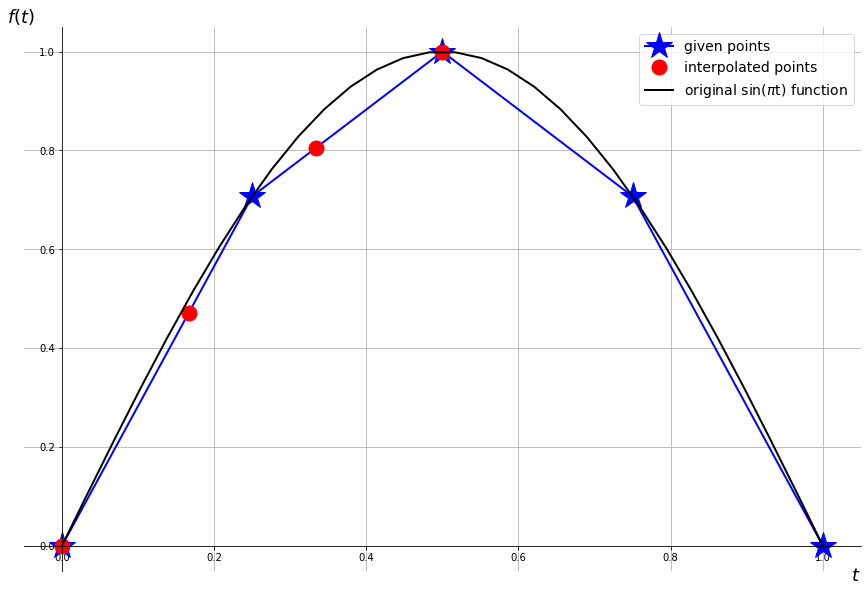

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.set_xlabel("$t$", fontsize=18, loc='right')
ax.set_ylabel("$f(t)$", fontsize=18, rotation='horizontal', loc='top')

x = np.linspace(0, 1, 30)
y = np.sin(np.pi*x)

ax.plot(t, ft, marker='*', markersize=28, label='given points', color='blue')
ax.plot(tinterp, yinterp, marker='o', markersize=15, label='interpolated points', color='red', linestyle='')
ax.plot(x,y, label='original $\sin$($\pi$t) function', color='black')
ax.legend(fontsize=14)

Отличие в значениях после интерполяции от реальных значений обусловлено самим принципом работы линейной интерполяции. Во время линейной интерполяции мы принимаем $f(x)_{x \in [a, b]} \approx f(a) + \frac{f(b)-f(a)}{b-a}(x-a)$, то есть заменяем функцию $f(x)$ на отрезке $[a, b]$ прямой с угловым коэффициентом $\frac{f(b)-f(a)}{b-a}$ и началом в точке $f(a)$. То есть на каждом из интервалов $(x_0, x_1), (x_1, x_2), ..., (x_{n-1}, x_n)$ интерполированное значение будет лежать на соответтвующей прямой. 

Этот эффект можем наблюдать на графике сверху (красные точки лежат на синей ломаной).

## Задание 2
Постройте по заданным пяти точкам интерполяционный многочлен Лагранжа или Ньютона и, используя его, найдите значения функции в точках $t = {0}, \frac{1}{6} , \frac{1}{3} , \frac{1}{2}$ , Сравните результаты со значениями, полученными при линейной интерполяции, и значениями синуса в этих точках. Постройте графики синуса и интерполяционного многочлена. Какую максимальную ошибку мы допускаем при аппроксимации синуса данным полиномом? Сравните экспериментальную погрешность с теоретической.

In [45]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(xp, yp):
    a = divided_diff(xp, yp)[0, :]
    x = sp.Symbol('x')
    n = len(xp) - 1 
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x - xp[n-k])*p
    return p
    
t = np.array([i / 4 for i in range(0, 5)])
ft = np.array([np.sin(np.pi*t) for t in t])

P = newton_poly(t, ft)
P_t = sp.lambdify('x', P, 'numpy')
sp.expand(P)

3.66022133874795*x**4 - 7.32044267749589*x**3 + 0.575276673434934*x**2 + 3.08494466531301*x

$$
P_{4}(x) = 3.66x^{4} - 7.32x^{3} + 0.58x^{2} + 3.08x
$$

	Max error in t = 0.16666666666666666:
 0.0009293416473448723

	t =
[0.         0.16666667 0.33333333 0.5       ]

	Newton's poly sin(pi*t):
[0.         0.49907066 0.86629493 1.        ]

	numpy.sin() sin(pi*t)):
[0.        0.5       0.8660254 1.       ]



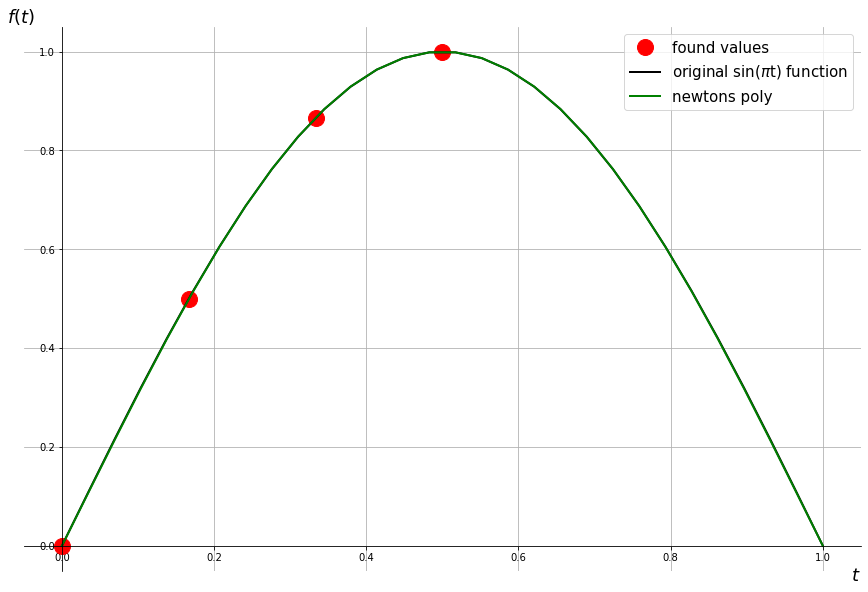

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.set_xlabel("$t$", fontsize=18, loc='right')
ax.set_ylabel("$f(t)$", fontsize=18, rotation='horizontal', loc='top')

x = np.linspace(0, 1, 30)
y = np.sin(np.pi*x)
p = P_t(x)

t_p = np.array([0, 1/6, 1/3, 1/2])
y_p = np.array([P_t(t) for t in t_p])
y_orig = np.array([np.sin(np.pi*t) for t in t_p])

plt.plot(t_p, y_p, label='found values', color='red', marker='o', markersize=16, linestyle='')
plt.plot(x,y, label='original $\sin$($\pi$t) function', color='black')
plt.plot(x, p, label='newtons poly', color='green')

ax.legend(fontsize=15)


error = np.max(abs(y_p - y_orig))
idx = np.where(abs(y_p - y_orig) == error)
print(f"\tMax error in t = {t_p[idx[0][0]]}:\n {error}\n")
print(f"\tt =\n{t_p}\n")
print(f"\tNewton's poly sin(pi*t):\n{y_p}\n") 
print(f"\tnumpy.sin() sin(pi*t)):\n{y_orig}\n")

## Задание 3
В программе сделать возможность строить многочлен Лагранжа или
Ньютона для произвольного набора точек $t = t0,\ t1,\  ...,\ t_n$ .

Уже сделал.

## Задание 4
Найдите значение интерполяционного полинома при $t = 2$. Почему оно так сильно отличается от значения синуса в этой точке?


In [47]:
P_t(2)

8.470996024365817

Потому что мы составляли многочлен Ньютона на отрезке $[0, 1]$. Для аргумента, выходящего за границы этого отрезка происходит параболическая _экстраполяция_. Это видно, если продолжить график P(t) за границы данного отрезка (ну и просто из его вида -- там 4 степень с положительным коээфициентом).

## Задание 5
Задайте функцию Рунге $f(x) = \frac{1}{1+25x^2}$ на отрезке $[−5, 5]$ в десяти равноотстоящих точках. Сравните значения функции и интерполяционного полинома при $x = 4,\  5$. Постройте графики функции и полинома на заданном отрезке и объясните поведение интерполяционного полинома. Посмотрите, что будет происходить при постепенном увеличении числа узлов интерполяции и подумайте, как можно избавиться от получившегося эффекта.


In [48]:
runge = lambda x: 1 / (1 + 25 * x**2)

X = np.linspace(-5, 5, 10)
runge_values = np.array([runge(i) for i in X])
poly = sp.lambdify('x', newton_poly(X, runge_values), 'numpy')
poly_values = np.array([poly(i) for i in X])
sp.expand(newton_poly(X, runge_values))
print(f"poly_value(4) = {poly(4)}")
print(f"runge_value(4) = {runge(4)}")
print(f"poly_value(5) = {poly(5)}")
print(f"runge_value(5) = {runge(5)}")

poly_value(4) = -0.00919354082239534
runge_value(4) = 0.0024937655860349127
poly_value(5) = 0.0015974440890967197
runge_value(5) = 0.001597444089456869


[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


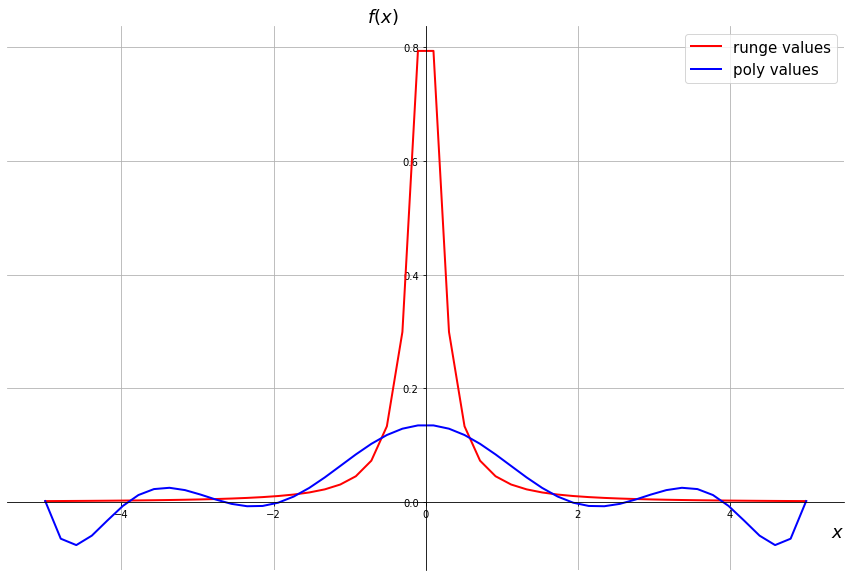

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.set_xlabel("$x$", fontsize=18, loc='right')
ax.set_ylabel("$f(x)$", fontsize=18, rotation='horizontal', loc='top')

x = np.linspace(-5, 5)
runge_values = np.array([runge(i) for i in x])
poly_values = np.array([poly(i) for i in x])
plt.plot(x, runge_values, label='runge values', color='red')
plt.plot(x, poly_values, label='poly values', color='blue')

ax.legend(fontsize=15)
print(X)


При увеличении количества узлов график полинома всё больше отклоняется от графике функции Рунге.

Происходит т.н. феномен Рунге, при котором происходят нежелательные осцилляции (колебания), возникающие при интерполяции полиномами высоких степеней.

Такой эффект роста уклонения при росте степени многочлена зависит как от выбираемой последовательности узлов, так и от интерполируемой функции. А именно, для любой последовательности узлов можно подобрать такую непрерывную функцию, что ошибка ее интерполяции по этим конкретным узлам будет неограниченно расти. С другой стороны, согласно аппроксимационной теореме Вейерштрасса, для любой непрерывной функции на отрезке можно подобрать последовательность полиномов, равномерно сходящихся к этой функции на отрезке. Это теоретически позволяет подобрать (для этой конкретной функции) последовательность узлов без феномена Рунге.

Компромиссом можно считать узлы Чебышёва, погрешность интерполяции по ним равномерно убывает для любой абсолютно непрерывной функции.

## Задание 6
Для приближения функции Рунге используйте Чебышёвские узлы.Постройте графики функции и многочлена.


In [50]:
def chebyshev_nodes(a, b, n):
    x = np.empty(n)
    for k in range(1, n+1):
        x[k-1] = 1/2 * (a + b) + 1/2 * (b - a) * np.cos((2*k-1)/(2*n)*np.pi)
    return x

runge = lambda x: 1 / (1 + 25 * x**2)

X = chebyshev_nodes(-5, 5, 10)
runge_values = np.array([runge(i) for i in X])
poly = sp.lambdify('x', newton_poly(X, runge_values), 'numpy')
poly_values = np.array([poly(i) for i in X])
sp.expand(newton_poly(X, runge_values))
print(f"poly_value(4) = {poly(4)}")
print(f"runge_value(4) = {runge(4)}")
print(f"poly_value(5) = {poly(5)}")
print(f"runge_value(5) = {runge(5)}")

poly_value(4) = 0.004774074159165864
runge_value(4) = 0.0024937655860349127
poly_value(5) = 0.003075151613101277
runge_value(5) = 0.001597444089456869


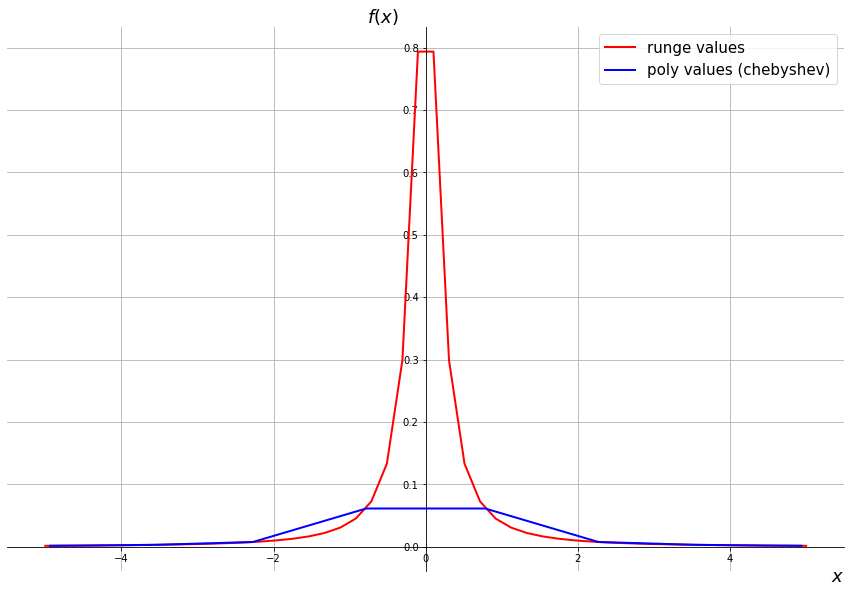

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid()
ax.set_xlabel("$x$", fontsize=18, loc='right')
ax.set_ylabel("$f(x)$", fontsize=18, rotation='horizontal', loc='top')

x = chebyshev_nodes(-5, 5, 10)
xx = np.linspace(-5, 5)
runge_values = np.array([runge(i) for i in xx])
poly_values = np.array([poly(i) for i in x])
plt.plot(xx, runge_values, label='runge values', color='red')
plt.plot(x, poly_values, label='poly values (chebyshev)', color='blue')

ax.legend(fontsize=15)

В математике под узлами Чебышёва понимают корни многочлена Чебышёва первого рода. Они часто используются в качестве узлов при полиномиальной интерполяции, так как позволяют снизить влияние феномена Рунге.